### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Sample Data

In [2]:
data = {
    'temperature': [22, 25, 20, 23, 18, 30, 28],
    'humidity': [55, 60, 58, 57, 65, 50, 52],
    'windspeed': [12, 10, 15, 8, 20, 5, 7],
    'season': ['spring', 'summer', 'spring', 'fall', 'winter', 'summer', 'fall'],
    'weather': ['clear', 'rainy', 'clear', 'cloudy', 'snow', 'clear', 'cloudy'],
    'holiday': [0, 0, 1, 0, 0, 0, 1],
    'workingday': [1, 1, 0, 1, 1, 1, 0],
    'bike_rentals': [120, 200, 80, 150, 60, 250, 100]
}

df = pd.DataFrame(data)

### Feature and Target

In [3]:
X = df.drop('bike_rentals', axis=1)
y = df['bike_rentals']

### Encode categorical variables

In [4]:
X = pd.get_dummies(X, columns=['season', 'weather'], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
numeric_features = ['temperature', 'humidity', 'windspeed', 'holiday', 'workingday']
X[numeric_features] = scaler.fit_transform(X[numeric_features])

### Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Multiple Regression Models

In [6]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+00, tolerance: 4.475e-01
  model = cd_fast.enet_coordinate_descent(


### Evaluate Models

In [7]:
def evaluate_model(y_test, y_pred):
    return {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

models = {
    "Linear Regression": y_pred_lr,
    "Polynomial Regression": y_pred_poly,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

results = pd.DataFrame({name: evaluate_model(y_test, pred) for name, pred in models.items()}).T
print("\nModel Performance:\n", results)


Model Performance:
                              R²           MSE         MAE
Linear Regression     -0.763851   5056.372444   64.528627
Polynomial Regression -1.613841   7493.010516   71.930424
Ridge Regression      -0.919139   5501.532823   62.195562
Lasso Regression      -1.158526   6187.775714   63.999940
Decision Tree         -5.662791  19100.000000  123.333333
Random Forest         -2.023472   8667.286667   75.800000


### Visualization


Best Model: Linear Regression


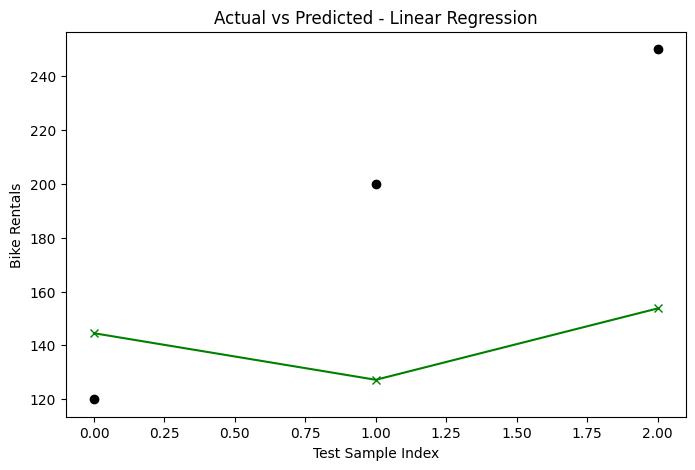

In [8]:
best_model_name = results["R²"].idxmax()
print("\nBest Model:", best_model_name)

best_pred = models[best_model_name]

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color='black', marker='o', label='Actual')
plt.plot(range(len(best_pred)), best_pred, color='green', marker='x', linestyle='-', label=best_model_name)
plt.title(f'Actual vs Predicted Bike Rentals ({best_model_name})')
plt.xlabel('Test Sample Index')
plt.ylabel('Bike Rentals')
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()